C:\Users\sriya\AppData\Local\Temp\ipykernel_4888\2513935555.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="score", y="word", data=real_top, ax=ax[0], palette="Blues_d")
C:\Users\sriya\AppData\Local\Temp\ipykernel_4888\2513935555.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="score", y="word", data=fake_top, ax=ax[1], palette="Reds_d")


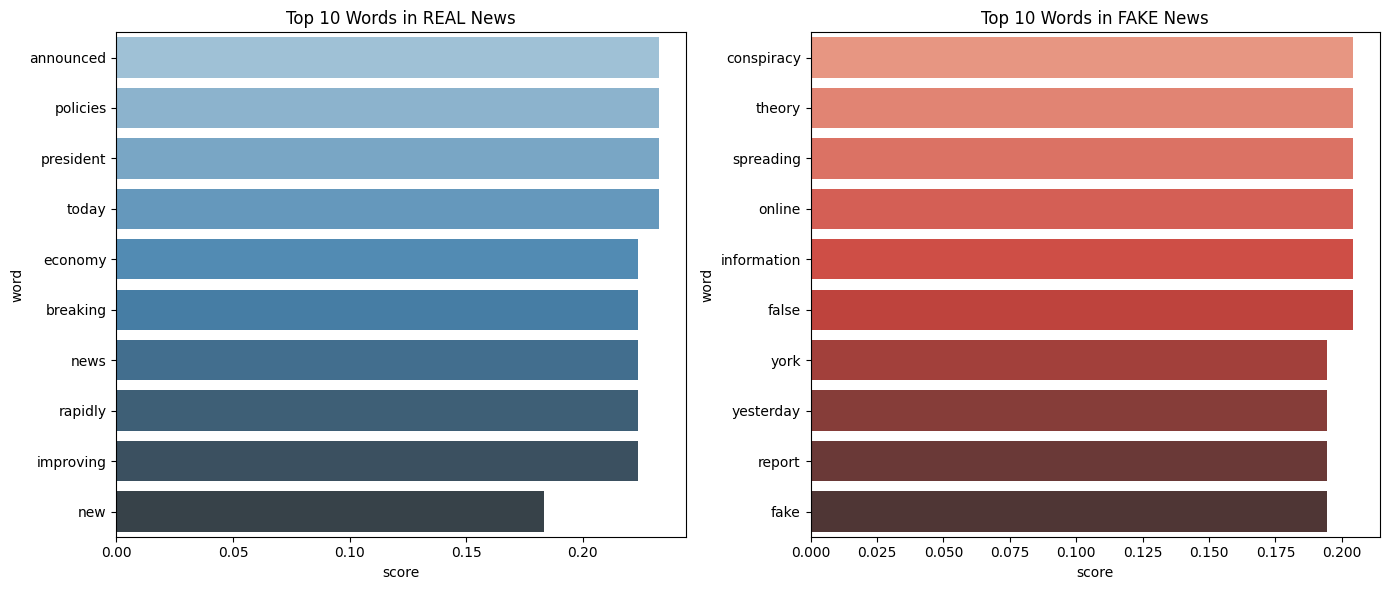

In [2]:
# Member 6: Visualization of Text Patterns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# ----------------------------------------------------------
# STEP 1: Load your dataset
# ----------------------------------------------------------
# If you already have a CSV dataset:
# data = pd.read_csv("news_dataset.csv")   # <-- replace with your CSV file path

# For demo/testing (so code runs without a CSV file):
data = pd.DataFrame({
    "text": [
        "Breaking news! The economy is improving rapidly.",
        "Fake report: Aliens landed in New York yesterday.",
        "The president announced new policies today.",
        "Conspiracy theory spreading false information online."
    ],
    "label": ["REAL", "FAKE", "REAL", "FAKE"]
})

# ----------------------------------------------------------
# STEP 2: Take a safe sample
# ----------------------------------------------------------
sample_size = min(5000, len(data))
sample_data = data.sample(sample_size, random_state=42)

# ----------------------------------------------------------
# STEP 3: Apply TF-IDF
# ----------------------------------------------------------
tfidf = TfidfVectorizer(max_features=1000, stop_words="english")
tfidf_matrix = tfidf.fit_transform(sample_data["text"])
feature_names = tfidf.get_feature_names_out()

# ----------------------------------------------------------
# STEP 4: Boolean masks for classes
# ----------------------------------------------------------
real_idx = sample_data["label"] == "REAL"
fake_idx = sample_data["label"] == "FAKE"

# Average TF-IDF per class
real_mean = tfidf_matrix[real_idx.to_numpy()].mean(axis=0).A1
fake_mean = tfidf_matrix[fake_idx.to_numpy()].mean(axis=0).A1

# ----------------------------------------------------------
# STEP 5: Top 10 words per class
# ----------------------------------------------------------
real_top = (
    pd.DataFrame({"word": feature_names, "score": real_mean})
    .sort_values(by="score", ascending=False)
    .head(10)
)

fake_top = (
    pd.DataFrame({"word": feature_names, "score": fake_mean})
    .sort_values(by="score", ascending=False)
    .head(10)
)

# ----------------------------------------------------------
# STEP 6: Plot
# ----------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharex=False)

sns.barplot(x="score", y="word", data=real_top, ax=ax[0], palette="Blues_d")
ax[0].set_title("Top 10 Words in REAL News")

sns.barplot(x="score", y="word", data=fake_top, ax=ax[1], palette="Reds_d")
ax[1].set_title("Top 10 Words in FAKE News")

plt.tight_layout()
plt.show()
